# Oncoradiomics Challenge : Grey Level Co-occurence Matrix (GLCM) feature



### Background

For this task, an input image 'IM' with dimensions (xmax,ymax) and intensity values ranging between 1 to 512 is considered. 

In this Pseudo-code, the second-order texture, GLCM, is computed. GLCM stands for Grey Level Co-occurence Matrix or Grey Tone Spatial Dependency Matrix).

GLCM is a tabular matrix of how often different combinations of pixel grey levels occur in an image. The matrix considers the relation between 2 pixels (reference and neighbour pixel) at a time.


### Section A

* numbins represents the quantization levels/bins to show intensities. For instance, in an 8-bit gray-scale image; pixel values (discrete) range from 0 (black) to 255 (white). So then, the quantization level is 256. For this challenge, the value of numbins is 128 - which means the quantization level is 128 and the pixel values (gray-scale) will be packed from 0 to 127.

* dx represents the position offset that is applied to any pixel of the image in the X-direction
* dy represents the position offset that is applied to any pixel of the image in the Y-direction
  In this case, the values dx=1 and dy=0 means "one-shift to the right"

* delta = 512/numbins using numbins = 128, gives a value of 4. 

* gmax takes in the value of numbins. So, gmax = 128

* out(gmax, gmax) defines the dimensions of the matrix out. Hence the matrix is out(128, 128)

* Initialize a variable 'cnt' to 0

### Section B

This loop initializes the GLCM matrix.

* Read an image (row-wise)
* Initialize every element of the out matrix to 0




### Section C

This loop computes the GLCM matrix. GLCM texture feature considers the relation between 2 pixels at a time, called the reference and the neighbour pixel.

* Read an image (row-wise)
* Set 1-pixel offset in x-direction
* Resample all the pixel values by the delta factor (i.e; the values are between 1-512 and now needs to be between 0-127)
  (This step is done to make it more robust to noise)
* Calculate the sum of all possible pixel combinations
* Record the number of times the combinations occur in cnt variable

### Section D

This section normalizes the GLCM matrix 

* Read the image (row-wise)
* Divide each element in the matrix by the count 



### Example feature calculated from GLCM

##### Energy Feature

\begin{equation*}
Energy = \left( \sum_{i,j=0}^{N-1} IM_{ij}  \right)^2 
\end{equation*}

### Sample code for GLCM

Author: Jesu Kiran Spurgen
Email-IDs: jesukirann@gmail.com, jesukiran@protonmail.com
Status: Prototype
Date of creation: 2018/09/26
Description of project: Oncoradiomics Challenge: 
***INFO: Image shape  827 1181


 ***INFO: INPUT IMAGE 



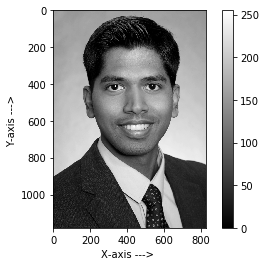



 ***INFO: OUT MATRIX 
 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


 ***INFO: OUT IMAGE 



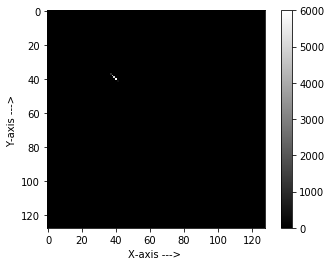



 ***INFO: NORMALIZED OUT MATRIX 
 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


 ***INFO: NORMALIZED OUT IMAGE 



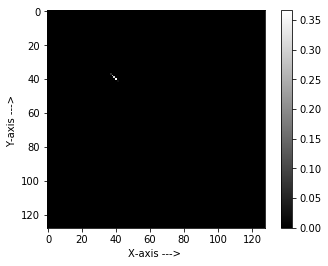



 ***INFO: Energy feature value 

1.0


In [6]:
from __future__ import division

%matplotlib inline

import numpy as np
from random import randint
import matplotlib.pyplot as plt
import matplotlib.image as mpi

__author__ = 'Jesu Kiran Spurgen'
__email__ = ['jesukirann@gmail.com', 'jesukiran@protonmail.com']
__status__ = 'Prototype'
__date__ = '2018/09/26'
__description__ = 'Oncoradiomics Challenge: '

print('Author: ' + __author__)
print('Email-IDs: ' + ', '.join(__email__))
print('Status: ' + __status__)
print('Date of creation: ' + __date__)
print('Description of project: ' + __description__)
print('=' * 60)


class OncoradiomicsChallenge():
    
    def __init__(self, numbins=128, 
                 dx=1, dy=0):
        
        self.numbins = numbins
        self.dx = dx
        self.dy = dy
        
        self.delta = 512 / self.numbins
        self.gmax = int(self.numbins)
        self.cnt = 0
        
        self.val = []
        
    def generate_dummy_input_image(self, xdim, 
                                 ydim):
        
        """
        Generates a dummy set of values 
        (between ranges 1 to 512) for a 2D image
        
        """
        
        image_dim = xdim * ydim   # Find total number of pixels
        
        for _ in range(image_dim):
            
            value = randint(1, 512)
            self.val.append(value) 
            
        return self.val
    
    def reshape_dummy_input_image(self, xdim):
        
        """
        Reshape 1D-array to 2D-array
        
        """
                
        self.IM = np.reshape(self.val, (-1, xdim))  # Reshape the 1D-array back to 2D-array
        self.IM = np.asarray(self.IM)
        
        self.xmax, self.ymax = self.IM.shape[::-1]
        print "***INFO: Image shape ", self.xmax, self.ymax

        return self.IM
    
    def read_an_actual_grayscale_image(self):
        
        """
        Read an actual grayscale image 
        (This is an example image)
        
        """
        self.IM = mpi.imread('C:/Users/spurge10/Desktop/test.jpg')
        self.IM = self.IM[:, :, 0]
        self.xmax, self.ymax = self.IM.shape[::-1]
        print "***INFO: Image shape ", self.xmax, self.ymax
                
        return self.IM
    
    def create_out_matrix(self):
        
        """
        Create a matrix of ones for
        the dimensions (xdim, ydim)
        
        """
        xdim = self.gmax
        ydim = self.gmax
        self.out = np.ones((xdim, ydim))

        return self.out
        
    def initialize_out_matrix(self):
        
        """
        Initialize all the elements 
        of the matrix to zero
        
        Note: One can also use np.zeros()
        to do the same
        
        """
        
        for y in range(0, self.gmax, 1):
            for x in range(0, self.gmax, 1):
                
                self.out[x,y] = 0
                
        self.initialized_out_matrix = self.out

        return self.initialized_out_matrix
    
    def calculate_out_matrix(self):
        
        """
        Calculate the out matrix
        
        """
        
        for y in range(0, self.gmax, 1):
            for x in range(0, self.gmax, 1):
                
                x1 = x + self.dx
                y1 = y + self.dy
                
                if ((x1>=0) and (y1 >=0) and (x1 <= self.xmax) and (y1 <= self.ymax)):
                    
                    bin1 = int(self.IM[x,y] / self.delta)
                    bin2 = int(self.IM[x1,y1] / self.delta)

                    
                    if ((bin1>=0) and (bin2>=0) and (bin1<self.gmax) and (bin2<self.gmax)):
                        
                        self.initialized_out_matrix[bin1,bin2] = self.initialized_out_matrix[bin1,bin2] + 1
                        self.cnt = self.cnt + 1
        
        
        self.out_matrix = self.initialized_out_matrix
        
        print("\n\n ***INFO: OUT MATRIX \n ")
        print(self.out_matrix)
        
        return self.out_matrix, self.cnt

    def normalize_matrix(self):
        
        """
        Normalize the out matrix
        (Range: 0-1)
        
        """
        
        for y in range(0, self.gmax, 1):
            for x in range(0, self.gmax, 1):
                
                self.out_matrix[x,y] = self.out_matrix[x,y] / self.cnt
        
        self.out_matrix = np.asarray(self.out_matrix)
        
        print("\n\n ***INFO: NORMALIZED OUT MATRIX \n ")
        print(self.out_matrix)
        
        return self.out_matrix
    
    def energy_matrix(self):
        
        """
        Feature: Energy
        
        """
        
        self.energy_matrix = np.square(np.sum(self.out_matrix))
                
        print(self.energy_matrix)

        return self.energy_matrix
    
    
    def show_image(self, img):
        
        """
        Display image with colorbar
        
        """
        
        plt.gray()
        
        plt.xlabel('X-axis ---> ')
        plt.ylabel('Y-axis ---> ')
        
        plt.imshow(img)
        plt.colorbar()
        
        return plt.show()
    
    
    
if __name__ == '__main__':
    
    analyse = OncoradiomicsChallenge(numbins=128, dx=1, dy=0)
    #analyse.generate_dummy_input_image(128, 128)
    #IM_img = analyse.reshape_dummy_input_image(128)
    
    IM_img = analyse.read_an_actual_grayscale_image()
    print("\n\n ***INFO: INPUT IMAGE \n")
    analyse.show_image(IM_img)
    print('=' * 60)
    
    analyse.create_out_matrix()
    analyse.initialize_out_matrix()
    
    out_img, _ = analyse.calculate_out_matrix()
    print("\n\n ***INFO: OUT IMAGE \n")
    analyse.show_image(out_img)
    print('=' * 60)
    
    cnt_img = analyse.normalize_matrix()
    print("\n\n ***INFO: NORMALIZED OUT IMAGE \n")
    analyse.show_image(cnt_img)
    print('=' * 60)
    
    print("\n\n ***INFO: Energy feature value \n")
    analyse.energy_matrix()

    





### Guide to reading the co-occurence matrix

The cell is filled with the number of times the combination (x,y) occurs, i.e; how many times within the image area a pixel (neighbour pixel) with grey level (any single value between 0-127) falls to the right of another pixel (reference pixel)